<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [31]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



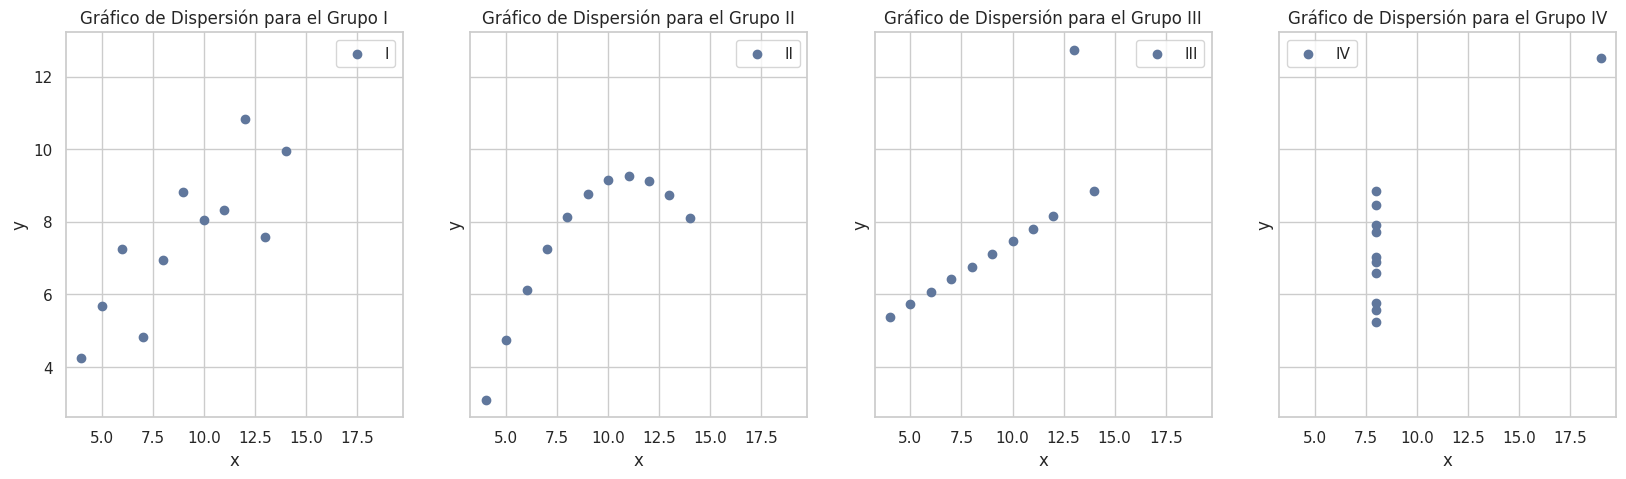

In [32]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)
for i, group in enumerate(data['dataset'].unique()):
    group_data = data[data['dataset'] == group]
    axes[i].scatter(group_data['x'], group_data['y'], label=group)
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_title(f'Gráfico de Dispersión para el Grupo {group}')
    axes[i].legend()
plt.show()


La diferencia significativa mas visible es la dispersion en cada grafico es diferente en el primero se ajusta a una recta lineal, el segundo una parabola, el tercero una recta lineal pero con un punto atipico y el ultimo una linea recta con un punto atipico. En los ultimos dos graficos esos datos atipicos pueden afectar de manera significa los modelos.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [33]:
describe = data.groupby('dataset').describe()
describe

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

Se puede observar que en los cuatro grupos la media de x, la media de y, la desviacion estandar de x , la desviacion estandar de y son iguales y poseen cuartiles y mediana similares.A partir de estos datos uno podria llegar a la conclusion equivocada de que los conjuntos son equivalentes.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



Grupo: I
  MSE: 1.2512
  R²: 0.6665


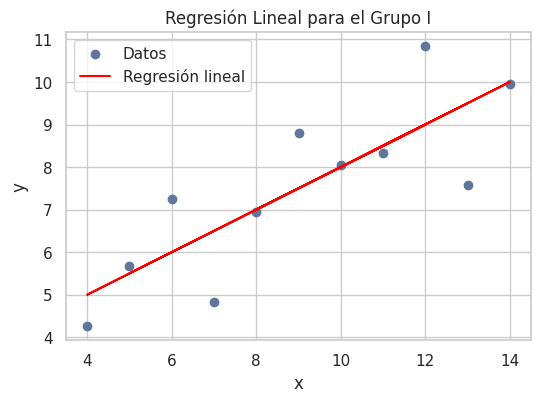

Grupo: II
  MSE: 1.2524
  R²: 0.6662


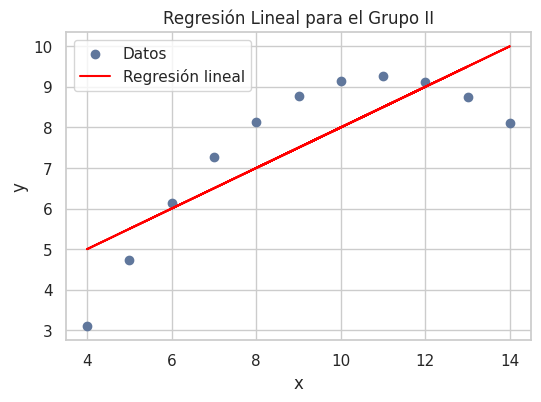

Grupo: III
  MSE: 1.2506
  R²: 0.6663


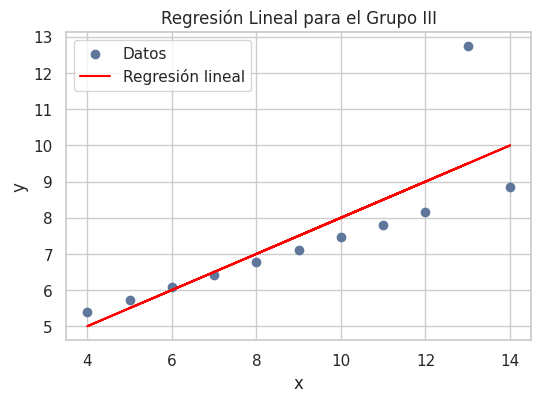

Grupo: IV
  MSE: 1.2493
  R²: 0.6667


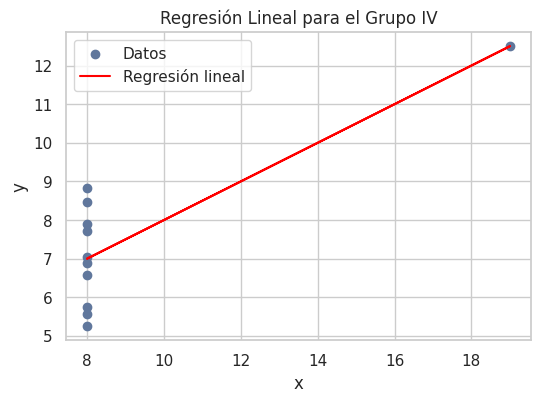

In [34]:
for group in data['dataset'].unique():
    group_data = data[data['dataset'] == group]
    X = group_data[['x']]
    y = group_data['y']

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"Grupo: {group}")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²: {r2:.4f}")

    plt.figure(figsize=(6, 4))
    plt.scatter(X, y, label='Datos')
    plt.plot(X, y_pred, color='red', label='Regresión lineal')
    plt.title(f'Regresión Lineal para el Grupo {group}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

Como en cada grupo hay pocos datos los modelos que realizamos no son tan precisos. En el primer caso la regresion lineal se comporta de buena manera adaptando de buena manera los datos, mientras que en el segundo no ya que esta es una parabola la cual no tiene comportamiento lineal, mismo caso para el cuarto grupo. Es importante notar que el MSE y $R^2$ es muy parecido en cada caso y esto es debido a que son calculadoscon metodos qu involucran la media y la desviacion estandar que como se vio en el item pasado eran casi identicas en cada grupo.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

Para el modelo 1 vemos que se adapta bien una regresion ñineal por lo que la mantedremos

Grupo: IV
  MSE: 1.2512
  R²: 0.6665


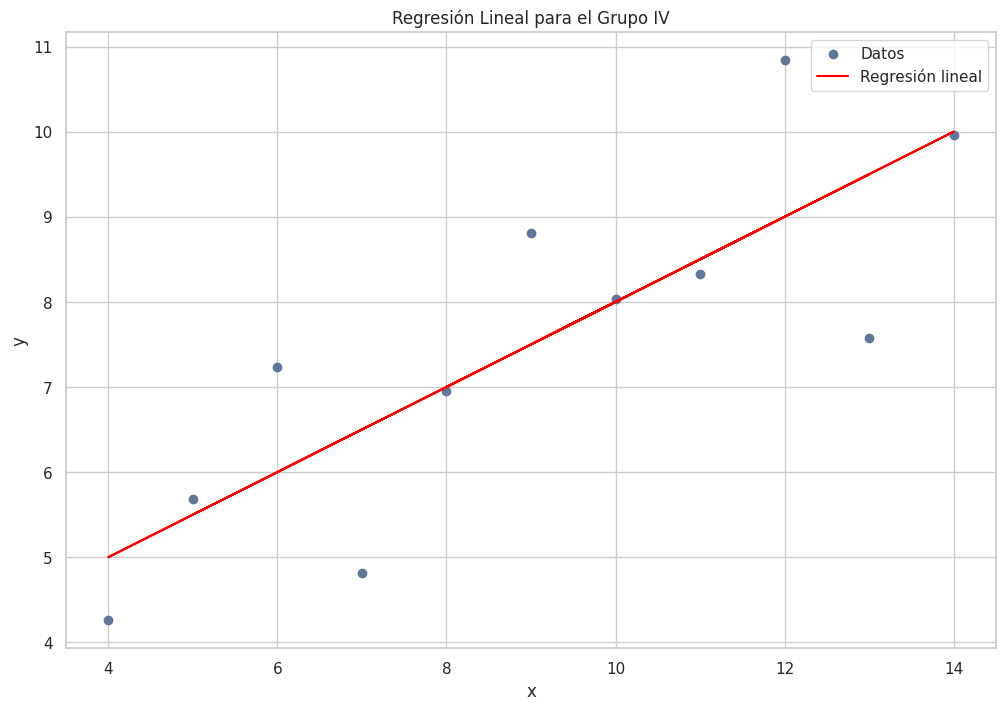

In [35]:
    group_1 = data[data['dataset'] == 'I']
    X = group_1[['x']]
    y = group_1['y']

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"Grupo: {group}")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²: {r2:.4f}")

    plt.scatter(X, y, label='Datos')
    plt.plot(X, y_pred, color='red', label='Regresión lineal')
    plt.title(f'Regresión Lineal para el Grupo {group}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

Para el modelo 2 es facil notar que un modelo cuadratico es lo más adecuado, asi que cambiaremos el modelo.

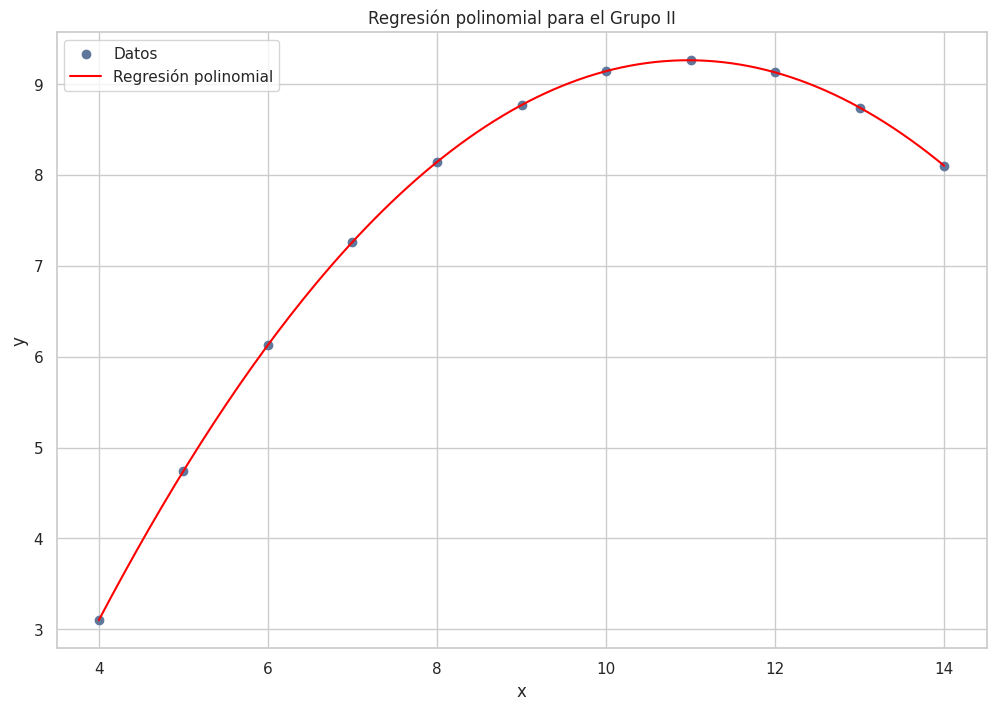

In [36]:
from sklearn.preprocessing import PolynomialFeatures
group_2 = data[data['dataset'] == 'II']
X = group_2['x'].values
y = group_2['y'].values

model = np.polyfit(X, y, 2)
polyline = np.poly1d(model)
x_range = np.linspace(min(X), max(X), 200)

plt.scatter(X, y, label='Datos')
plt.plot(x_range, polyline(x_range), color='red', label='Regresión polinomial')
plt.title('Regresión polinomial para el Grupo II')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Podemos ver que para este caso se adapta de buena manera el modelo seleccionado

Para el modelo 3 podemos ver que tenemos un dato atipico por lo que utilizaremos un outliner, por lo que modificaremos el modelo

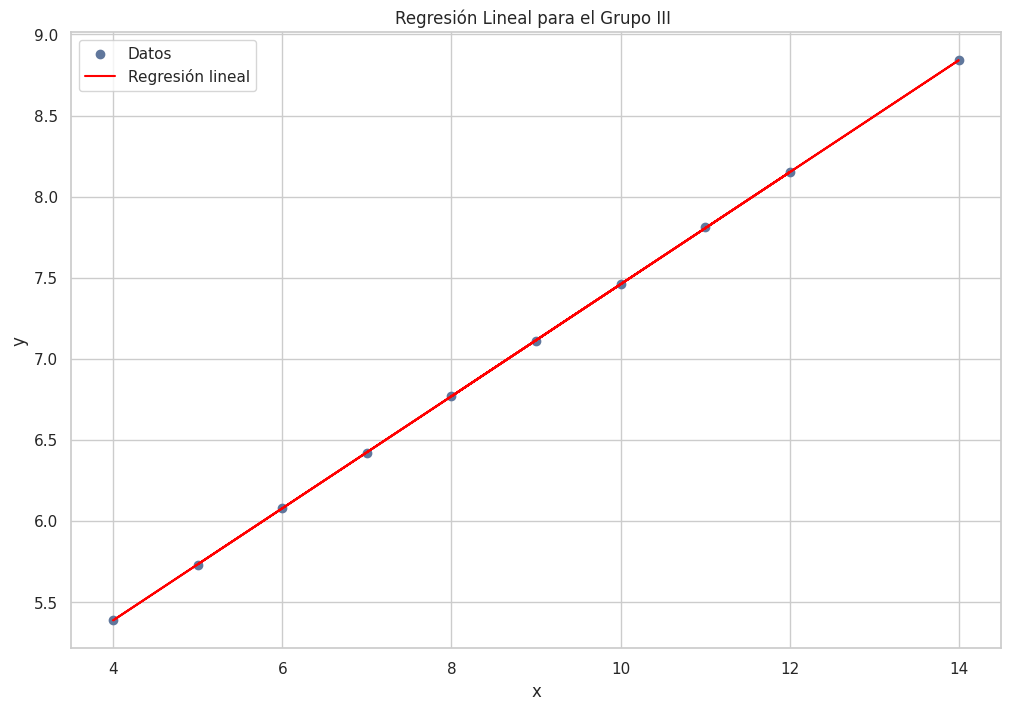

In [37]:
group_3 = data[data['dataset'] == 'III']
group_3 = group_3.loc[group_3['x'] != 13]
X = group_3[['x']]
y = group_3['y']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, label='Datos')
plt.plot(X, y_pred, color='red', label='Regresión lineal')
plt.title(f'Regresión Lineal para el Grupo III ')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Para estye caso el modelo seleccionado se adapta bien

Para el modelo 4 tambien tratamos con un dato atipico por lo que utilizaremos un outliner, este dato se puede deber a una informacion mal obtenida.

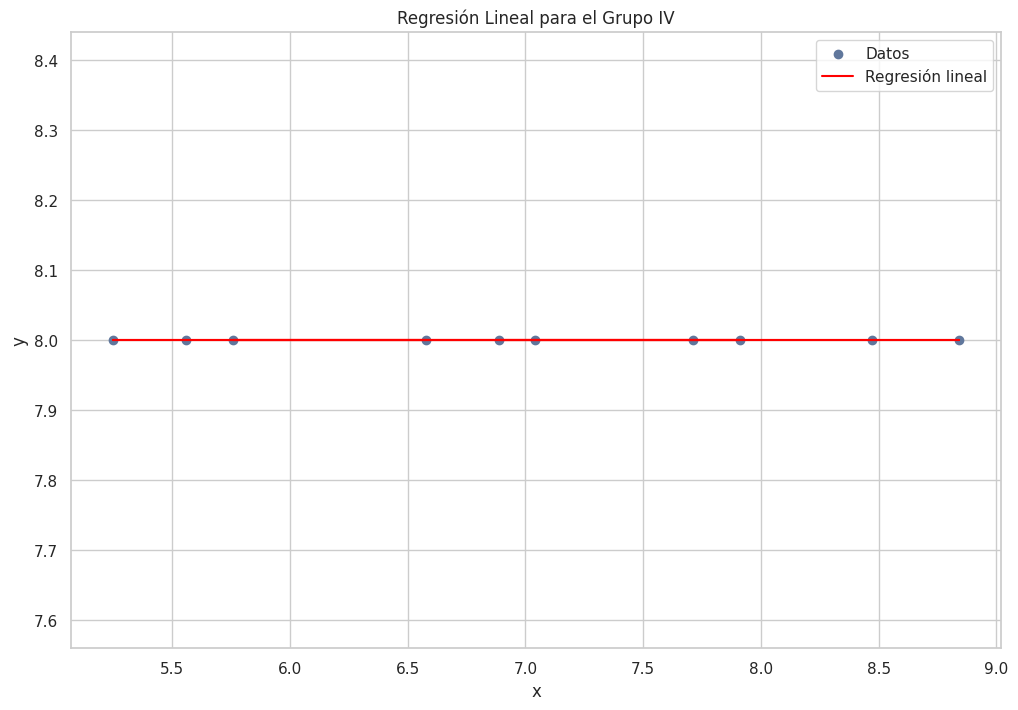

In [38]:
group_4 = data[data['dataset'] == 'IV']
group_4 = group_4.loc[group_4['x'] != 19]
X = group_4[['y']]
y = group_4['x']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, label='Datos')
plt.plot(X, y_pred, color='red', label='Regresión lineal')
plt.title(f'Regresión Lineal para el Grupo IV')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Se puede ver que para este caso una linea recta era lo mas adecuado para el modelo sin considerar el dato atipico.
